In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler,PowerTransformer

# Importing the dataset using pandas library

In [36]:
data=pd.read_csv("delivery_time (1).csv")

In [3]:
data.head() ##Observing the first 5 rows

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Creating Input and output variables

In [37]:
x1=data[['Sorting Time']]
y1=data[['Delivery Time']]

# EDA

In [39]:
data.info() ## checking the data types of input and output variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### we see that there are no null values.

In [8]:
data['Sorting Time'].mean()
data['Delivery Time'].mean()

16.79095238095238

In [9]:
data['Sorting Time'].median()
data['Delivery Time'].median()

17.83

In [10]:
data['Sorting Time'].std()
data['Delivery Time'].std()

5.074900890423285

In [11]:
data['Sorting Time'].var()
data['Delivery Time'].var()

25.754619047619048

In [12]:
data['Sorting Time'].skew()
data['Delivery Time'].skew()

0.3523900822831107

In [13]:
data['Sorting Time'].kurt()
data['Delivery Time'].kurt()

0.31795982942685397

### From the above EDA analysis we see that the skeweness and kurtosis is postive thus the data is right skewed and peaked.

In [14]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


#### As the correlation between Sorting time and delivery time is 0.82 we conclude that there is a strong positive correlation

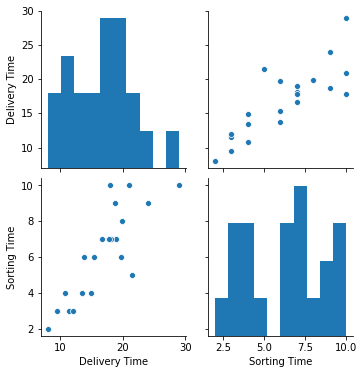

In [16]:
sns.pairplot(data)

## Creating the model

In [17]:
model=smf.ols("y1~x1",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        21:14:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x1             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The acccuracy of the model is 68%

In [18]:
y1_pred=model.predict(pd.DataFrame(x1))

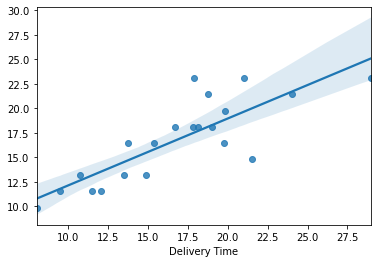

In [41]:
sns.regplot(y1,y1_pred) ##Comparing the actual and the predicted values

In [42]:
x=np.cbrt(np.cbrt(np.cbrt(np.cbrt(data['Sorting Time']))))
y=(np.reciprocal(data['Delivery Time']))

In [43]:
model1=smf.ols("y~x",data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     70.46
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           8.15e-08
Time:                        21:27:49   Log-Likelihood:                 66.720
No. Observations:                  21   AIC:                            -129.4
Df Residuals:                      19   BIC:                            -127.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5176      0.411      8.553      0.000       2.657       4.378
x             -3.3791      0.403     -8.394      0.000      -4.222      -2.537
==============================================================================
Omnibus:                        0.523   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.770   Jarque-Bera (JB):                0.439
Skew:                          -0.313   Prob(JB):                        0.803
Kurtosis:                       2.667   Cond. No.                         355.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The acccuracy of the model is 78.8%

In [44]:
y_pred=(model.predict(pd.DataFrame(x)))

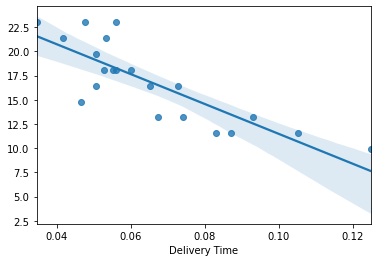

In [45]:
sns.regplot(y,y_pred)

In [24]:
x2=x1.copy()
y2=y1.copy()

In [25]:
x2

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


## Creating the model with standardised data

In [26]:
sc= StandardScaler() 

In [27]:
x2=pd.DataFrame(sc.fit_transform(x2))

In [28]:
y2=pd.DataFrame(sc.fit_transform(y2))

In [29]:
frames=[x2,y2]
data2=pd.concat(frames,axis=1)

In [30]:
model2=smf.ols("y1~x2",data=data2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        21:15:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7910      0.640     26.217      0.000      15.450      18.131
x2             4.0908      0.640      6.387      0.000       2.750       5.431
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Applying standardistaion doesn't improve the accuracy of the model and we see that the accuracy is 68.2%

In [31]:
pt=PowerTransformer(method='box-cox') ## Applying box-cox transformation

In [32]:
data1=data.copy()

In [33]:
data2=pd.DataFrame(pt.fit_transform(data1),columns=['DT','ST'])

In [34]:
data2

,DT,ST
0,0.867768,1.455858
1,-0.623167,-0.855885
2,0.638576,-0.011708
3,1.393788,1.108878
4,2.208078,1.455858
5,-0.226199,-0.011708
6,0.497889,0.377404
7,-1.577335,-1.325268
8,0.286899,1.455858
9,0.450435,1.108878


In [35]:
model3=smf.ols("DT~ST",data=data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     48.50
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           1.23e-06
Time:                        21:16:00   Log-Likelihood:                -16.486
No. Observations:                  21   AIC:                             36.97
Df Residuals:                      19   BIC:                             39.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     3.4e-16      0.122   2.79e-15      1.000      -0.255       0.255
ST             0.8477      0.122      6.965      0.000       0.593       1.102
==============================================================================
Omnibus:                        2.775   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                1.589
Skew:                           0.668   Prob(JB):                        0.452
Kurtosis:                       3.170   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Accuracy of the model is 71.9%